<a href="https://colab.research.google.com/github/juanmggb/maestria/blob/main/mc_fb_optimization/mc_fb_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pyDOE

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pyDOE: filename=pyDOE-0.3.8-py3-none-any.whl size=18184 sha256=4713baf67e854bbaa159ef1309615a3e18cce116827b03fb7f16eb74920fb4c6
  Stored in directory: /root/.cache/pip/wheels/00/3e/fa/5705bf59c2053c17c4799c3ab66a2e356c32f40a3044fe2134
Successfully built pyDOE


In [2]:
pip install geneticalgorithm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 KB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for func-timeout: filename=func_timeout-4.3.5-py3-none-any.whl size=15096 sha256=7cda5403d6083f78e9f181f6661fe5bd9d0ad00ac160c99ed874655f5d84c422
  Stored in directory: /root/.cache/pip/wheels/a8/92/ca/5bbab358275e310af23b73fc32ebf37d6a7a08c87c8d2cdbc1
Successfully built func-timeout


In [ ]:
# In order to access the package you need to have its path. The path required is the path WHERE that package is soterd, not it path
# sys.path.insert(1, 'd:\\DYNAMICAL SIMULATION\\maestria\\maestria')

In [3]:
!git clone https://github.com/juanmggb/maestria.git

Cloning into 'maestria'...
remote: Enumerating objects: 306, done.
remote: Counting objects: 100% (103/103), done.
remote: Compressing objects: 100% (97/97), done.
remote: Total 306 (delta 47), reused 18 (delta 6), pack-reused 203
Receiving objects: 100% (306/306), 9.25 MiB | 19.28 MiB/s, done.
Resolving deltas: 100% (132/132), done.


In [4]:
cd maestria

/content/maestria


In [5]:
ls

case_studies/  mc_fb/               ml_fb/                 README.md
data/          mc_fb_optimization/  ml_fb_optimization/    tensors/
mc_batch/      ml_batch/            parameter_estimation/  utilis/


In [22]:
# Importar modulos
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from geneticalgorithm import geneticalgorithm as ga
import sys

In [6]:
import utilis.functions as fn
from utilis.models import inhibition_model_fb
from utilis.solvers import euler

In [7]:
def inflow_rate(t):

    return 1

In [8]:
# Parameters
mu_max = 1.20
yxs = 0.2
ks = 280
ypx = 4
ki = 0.3
sf = 50

In [11]:
# Initial conditions
x0 = np.array([0.2, 40, 10])

# Integration time
tf = 100
dt = 0.1
time = np.arange(0, tf, dt)

# Solve the ODEs
x, s, V = euler(inhibition_model_fb, x0, 0, tf, dt, inflow_rate, mu_max, yxs, ks, ypx, ki, sf).T

In [12]:
predicted = fn.create_df_fb(time, x, s, V)
predicted.head()

,t,x,s,V
0,0.0,0.200000,40.000000,10.0
1,0.1,0.199200,40.094000,10.1
2,0.2,0.198422,40.186107,10.2
3,0.3,0.197666,40.276376,10.3
4,0.4,0.196931,40.364860,10.4


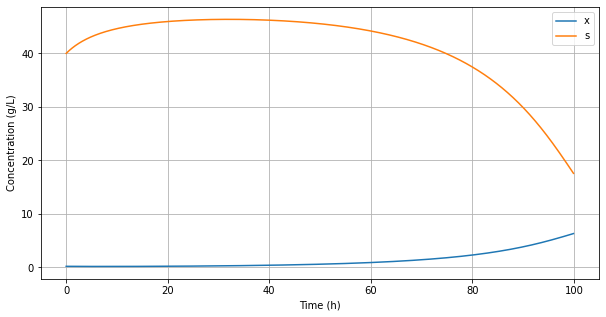

In [13]:
fn.plot_data_fb(predicted)

In [14]:
u = np.arange(0, 3, 0.1)
fitness_values = [fn.fitness_function_fb(u_val, x0, 0, tf, dt, mu_max, yxs, ks, ypx, ki, sf) for u_val in u]

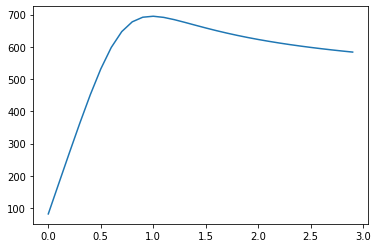

In [17]:
plt.plot(u, fitness_values)

In [18]:
def fitness_function_wrapper(u):

    return -fn.fitness_function_fb(u[0], x0, 0, tf, dt, mu_max, yxs, ks, ypx, ki, sf)

In [19]:
# Configuramos algoritmo genetico
algorithm_param = {'max_num_iteration': 20,
                   'population_size':10,
                   'mutation_probability':0.1,
                   'elit_ratio': 0.01,
                   'crossover_probability': 0.8,
                   'parents_portion': 0.3,
                   'elistism':True,
                   'crossover_type':'uniform',
                   'max_iteration_without_improv':None}

In [20]:
# Establecer los rangos de busqueda para las variables de decision
varbound=np.array([
    [0, 3],
])

In [23]:
# LLamar el algortimo genetico para realizar la optimizacion
model=ga(function=fitness_function_wrapper,
         dimension=1,
         variable_type='real',
         variable_boundaries=varbound,
         algorithm_parameters=algorithm_param)

 The best solution found:
 [0.91748546]

 Objective function:
 -692.837640108869


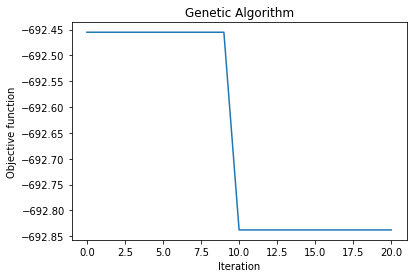

In [24]:
# Realizar la busqueda
model.run()

In [25]:
model.best_function

-692.837640108869

In [26]:
model.best_variable

array([0.91748546])